In [1]:
!pip install xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing all the Necessary Libraries for Text Processing and Machine Learning

In [2]:
import pandas as pd
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer     #Converts text into numerical format using TF-IDF
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report, recall_score, precision_score
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords   #Common words like "the", "and", etc., are eliminated
from nltk.tokenize import word_tokenize #used to split text into words (tokens).
from nltk.stem import WordNetLemmatizer #Words are reduced to their base form for consistency
from sklearn.naive_bayes import MultinomialNB
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanna\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading the dataset

In [3]:
df = pd.read_csv('Actual_dataset.csv')

In [4]:
df['label'].value_counts()

label
non-suicide    15000
suicide        12846
depression     10371
Name: count, dtype: int64

In [5]:
y_label = df['label']

In [6]:
df_1 = df.drop(columns=['label'])

In [7]:
df_1

,text
0,I recently went through a breakup and she said...
1,"I do not know how to navigate these feelings, ..."
2,"So I have been with my bf for 5 months , and h..."
3,I have been severly bullied since i was 5 till...
4,My mom made me go to a camp that she knows I h...
...,...
38212,I have math test Please wish me luck\nI fear.
38213,Lol i think everyone forgot me Thats fine I guess
38214,I'm done My bitch-ass step brother is a fuckin...
38215,Official leaked! u/MegaThicccÃ¢ÂÂs pronouns ...


In [8]:
X_train , X_test , y_train, y_test = train_test_split(df_1,y_label,test_size=0.2)

Data Cleaning and Data Preprocessing

In [9]:
def remove_url(text):
    return re.sub(r"http\S+", "", text)

exclude =string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "" , exclude))


In [10]:
stopwords= stopwords.words('english')
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords:
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)
            

In [11]:
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

In [12]:
def preprocess(train_data):
    train_data['text']=train_data['text'].str.lower()
    train_data['text'] = train_data['text'].apply(remove_url)#remove url
    train_data['text']=train_data['text'].apply(remove_punctuation)# remove punctuation
    train_data['text']=train_data['text'].apply(remove_stopwords)
    train_data['text'] = train_data['text'].apply(lemmatize_text)

In [13]:
preprocess(X_train)

In [14]:
preprocess(X_test)

In [15]:
tfidf_vectorizer = TfidfVectorizer()

    # Fit-transform the  data
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train['text'])
test_tf = tfidf_vectorizer.transform(X_test['text'])
filename = 'tfidf_vectorizer.pik'
pickle.dump(tfidf_vectorizer, open(filename, 'wb')) 

In [16]:
y_label.value_counts()
y_lab = ['non-suicide' ,
'suicide' ,       
'depression' ]

#NAIVE BASE CLASSIFIER

Accuracy: 0.782705389848247

Classification Report:
              precision    recall  f1-score   support

  depression       0.92      0.57      0.70      1992
 non-suicide       0.96      0.77      0.85      2970
     suicide       0.64      0.96      0.77      2682

    accuracy                           0.78      7644
   macro avg       0.84      0.77      0.77      7644
weighted avg       0.84      0.78      0.78      7644



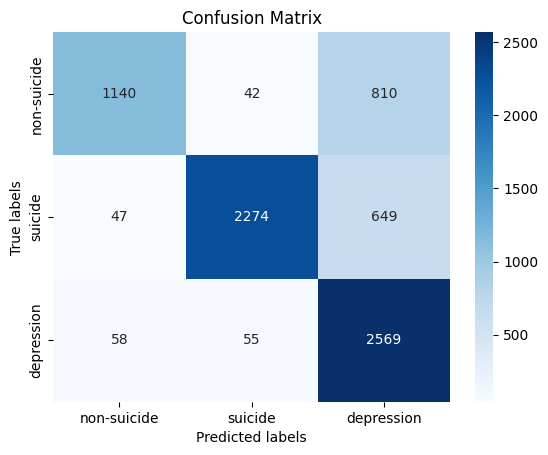

In [17]:
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_matrix, y_train)

# Make predictions
y_pred = nb_classifier.predict(test_tf)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_lab,
            yticklabels=y_lab)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


filename = 'MN_1.pik'
pickle.dump(nb_classifier, open(filename, 'wb'))

LOGISTIC REGRESSION

Validation Accuracy: 0.8880167451596023
Classification Report:
               precision    recall  f1-score   support

  depression       0.86      0.91      0.88      1992
 non-suicide       0.89      0.94      0.91      2970
     suicide       0.91      0.82      0.86      2682

    accuracy                           0.89      7644
   macro avg       0.89      0.89      0.89      7644
weighted avg       0.89      0.89      0.89      7644



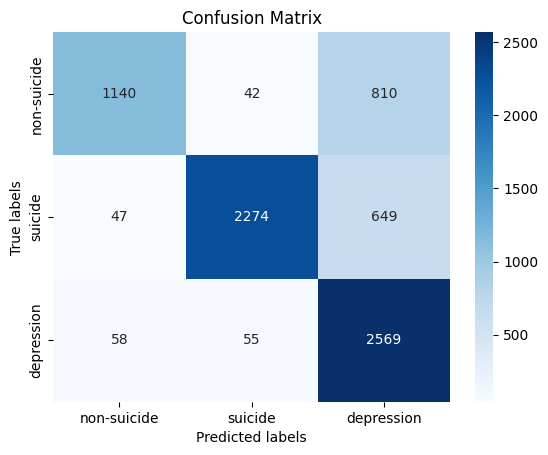

In [18]:
lr_model = LogisticRegression( random_state=42)

# Fit the model on the training data
lr_model.fit(tfidf_matrix, y_train)

y_pred_custom = lr_model.predict(test_tf)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred_custom)
classification_r = classification_report(y_test, y_pred_custom)
print("Validation Accuracy:", accuracy)
print("Classification Report:\n", classification_r)

cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_lab,
            yticklabels=y_lab)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

filename = 'logistic.pik'
pickle.dump(lr_model, open(filename, 'wb')) 

DECISION TREE

Validation Accuracy: 0.7804814233385662
Classification Report:
               precision    recall  f1-score   support

  depression       0.77      0.80      0.78      1992
 non-suicide       0.80      0.81      0.81      2970
     suicide       0.76      0.74      0.75      2682

    accuracy                           0.78      7644
   macro avg       0.78      0.78      0.78      7644
weighted avg       0.78      0.78      0.78      7644



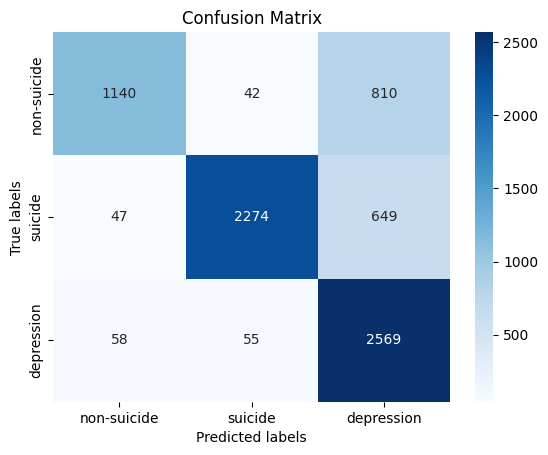

In [19]:
decision_tree = DecisionTreeClassifier( random_state=42)

# Fit the model on the training data
decision_tree.fit(tfidf_matrix, y_train)

y_pred_custom = decision_tree.predict(test_tf)

# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred_custom)
classification_r = classification_report(y_test, y_pred_custom)
print("Validation Accuracy:", accuracy)
print("Classification Report:\n", classification_r)

cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_lab,
            yticklabels=y_lab)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

filename = 'decision_tree.pik'
pickle.dump(decision_tree, open(filename, 'wb')) 

RANDOM FOREST

Starting model training...
Model training completed!
Prediction completed!
Validation Accuracy: 0.7960491889063318
Classification Report:
               precision    recall  f1-score   support

  depression       0.85      0.72      0.78      1992
 non-suicide       0.76      0.92      0.83      2970
     suicide       0.82      0.72      0.77      2682

    accuracy                           0.80      7644
   macro avg       0.81      0.78      0.79      7644
weighted avg       0.80      0.80      0.79      7644

Model saved successfully!


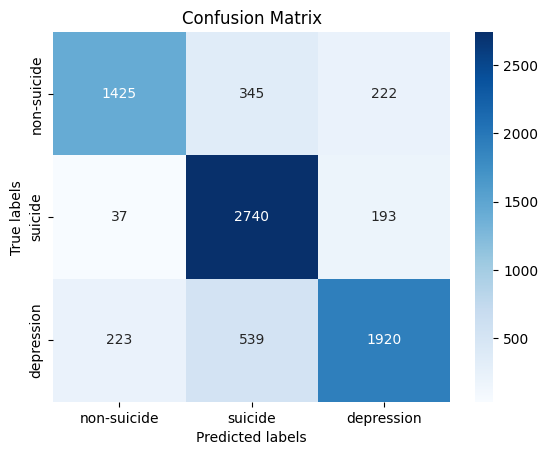

In [20]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reduce n_estimators for faster training
random_forest = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=-1)  # Uses all CPU cores

# Fit the model on the training data
print("Starting model training...")
random_forest.fit(tfidf_matrix[:5000], y_train[:5000])  # Train on a smaller subset
print("Model training completed!")

# Predict
y_pred_custom = random_forest.predict(test_tf)
print("Prediction completed!")

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_custom)
classification_r = classification_report(y_test, y_pred_custom)
print("Validation Accuracy:", accuracy)
print("Classification Report:\n", classification_r)

# Fix confusion matrix issue (ensure correct variable is used)
cm = confusion_matrix(y_test, y_pred_custom)  # Fix: use y_pred_custom instead of y_pred
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y_lab, yticklabels=y_lab)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")  # Save plot instead of showing to prevent freezing

# Save model efficiently
filename = 'random_forest.pkl'  # Fix extension to .pkl
pickle.dump(random_forest, open(filename, 'wb'), protocol=4)
print("Model saved successfully!")


In [21]:
results = [
    {'model': 'Multinomial Naive Base', 'accuracy': 0.75, 'recall': 0.75, 'precision': 0.83},
    {'model': 'LogisticRegression', 'accuracy': 0.88, 'recall': 0.88, 'precision': 0.88},
    {'model': 'Decision Tree', 'accuracy': 0.77, 'recall': 0.77, 'precision': 0.77},
    {'model': 'Random Forest', 'accuracy': 0.84, 'recall': 0.84, 'precision': 0.84}
]

Evaluation Metrics

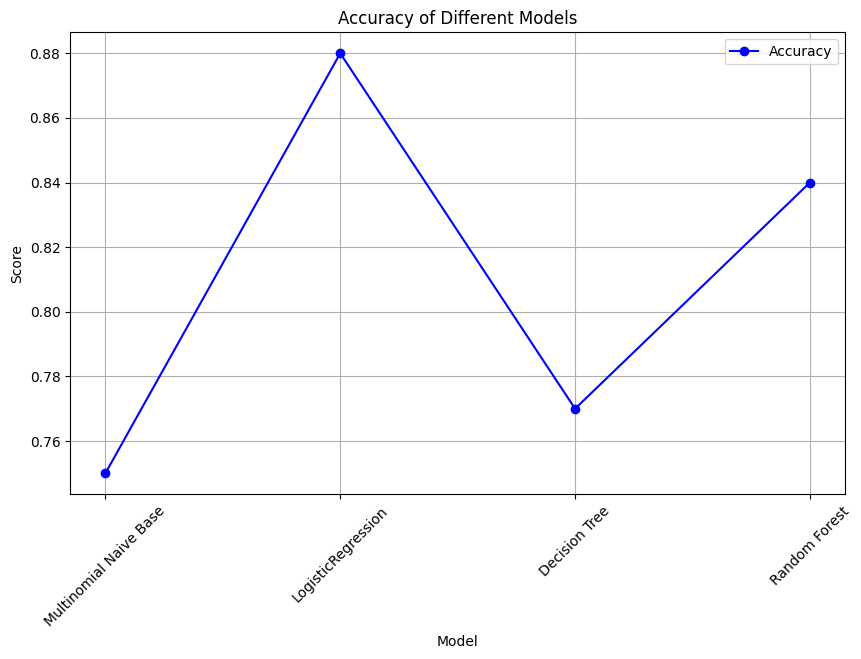

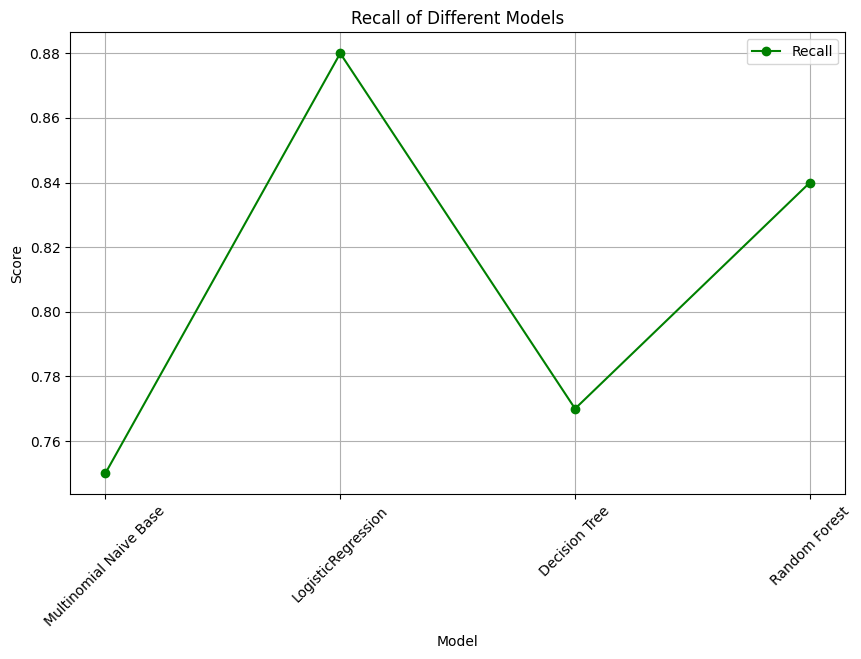

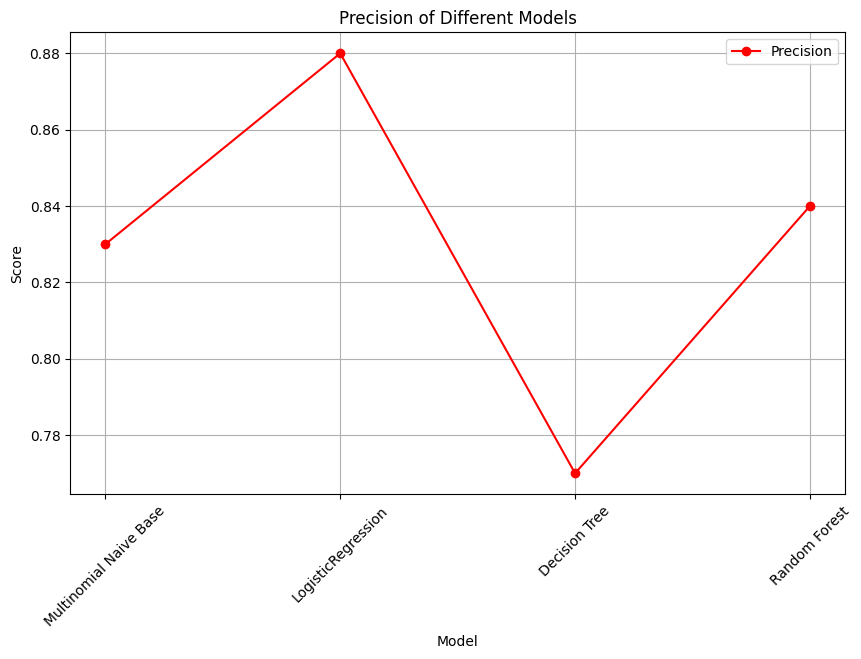

In [22]:
import matplotlib.pyplot as plt

# Data
labels = [result['model'] for result in results]
accuracy = [result['accuracy'] for result in results]
recall = [result['recall'] for result in results]
precision = [result['precision'] for result in results]

# Plotting
plt.figure(figsize=(10, 6))

# Accuracy plot
plt.plot(labels, accuracy, marker='o', label='Accuracy', color='b')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Recall plot
plt.figure(figsize=(10, 6))
plt.plot(labels, recall, marker='o', label='Recall', color='g')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Recall of Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Precision plot
plt.figure(figsize=(10, 6))
plt.plot(labels, precision, marker='o', label='Precision', color='r')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Precision of Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()


SHAP

SHAP

Accuracy: 0.8729722658294087


c:\Users\sanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


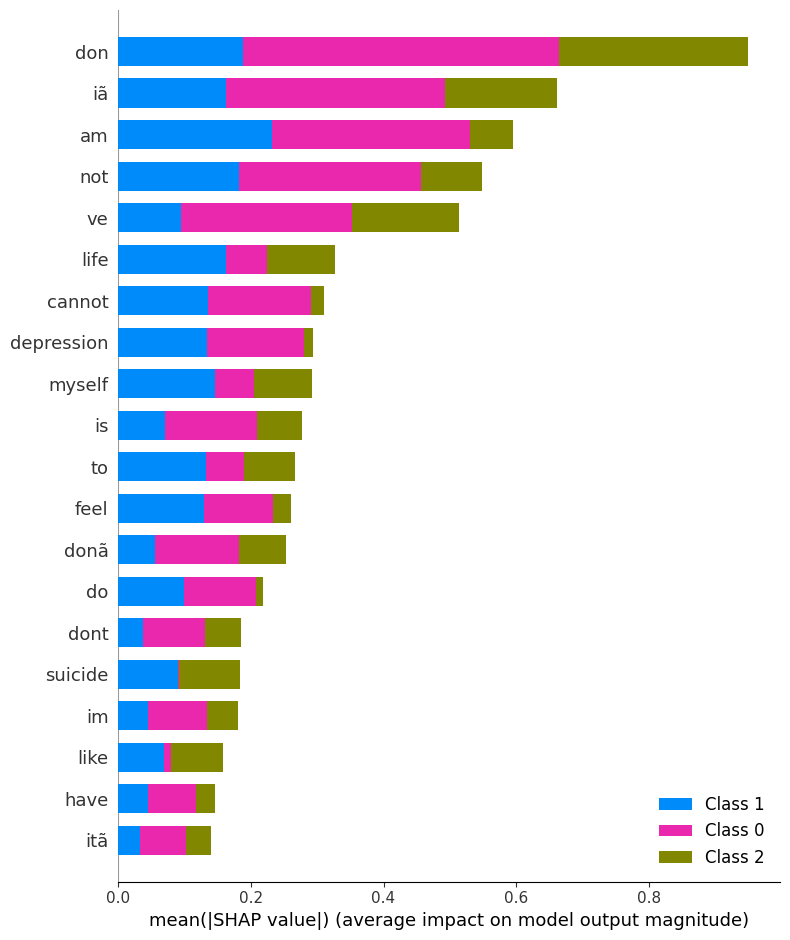

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Actual_dataset.csv")

# Features and target
X_text = df["text"]
y = df["label"]

# Convert text data to numerical format
vectorizer = TfidfVectorizer(max_features=1000)  # Limit features for SHAP speed
X = vectorizer.fit_transform(X_text)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# SHAP explanation (convert sparse matrix to dense)
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Plot SHAP bar chart for global explanation
shap.summary_plot(shap_values, X_test.toarray(), feature_names=feature_names, plot_type="bar")


LIME

In [24]:
print(df['label'].value_counts())


label
non-suicide    15000
suicide        12846
depression     10371
Name: count, dtype: int64


In [25]:
lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', class_weight='balanced')


LIME

In [26]:
# Install required library if not already installed
# !pip install lime --quiet

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import lime
import lime.lime_text
from sklearn.pipeline import make_pipeline

# ===============================
# 1. Load and Explore the Dataset
# ===============================

# Load your CSV file
df = pd.read_csv("Actual_dataset.csv")  # Replace with your dataset name
print("Label Distribution:\n", df['label'].value_counts())

# ===============================
# 2. Preprocess and Train the Model
# ===============================

# Split into features and target
X = df['text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression with balanced classes
lr = LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs', multi_class='multinomial')
lr.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test_tfidf)
print("\n✅ Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ===============================
# 3. LIME Explainer Setup
# ===============================

class_names = np.unique(y)
pipeline = make_pipeline(vectorizer, lr)
explainer = lime.lime_text.LimeTextExplainer(class_names=class_names)

# ===============================
# 4. Predict on a Known Depression Example
# ===============================

# Find a test example with label "depression"
for i, text in enumerate(X_test):
    if y_test.iloc[i] == 'depression':
        sample_text = text
        break

print("\nExample Text (Depression):", sample_text)
predicted_label = pipeline.predict([sample_text])[0]
print("Predicted Label:", predicted_label)
exp = explainer.explain_instance(sample_text, pipeline.predict_proba, num_features=6)
exp.show_in_notebook(text=sample_text)  # Interactive in Jupyter
# or fallback: exp.as_pyplot_figure()

# ===============================
# 5. 🔁 User Input + Live Prediction
# ===============================

print("\n--- LIME Prediction Interface ---")
print("Type your own sentence to see prediction and explanation.")
print("Type 'exit' to quit.\n")

while True:
    user_input = input("Enter your text: ")
    if user_input.lower().strip() == "exit":
        print("Goodbye! 👋")
        break

    prediction = pipeline.predict([user_input])[0]
    print("Predicted Label:", prediction)

    exp = explainer.explain_instance(user_input, pipeline.predict_proba, num_features=6)
    
    try:
        # Show interactive LIME HTML explanation (for Jupyter Notebook)
        exp.show_in_notebook(text=user_input)
    except:
        # Use matplotlib if in terminal
        exp.as_pyplot_figure()


Label Distribution:
 label
non-suicide    15000
suicide        12846
depression     10371
Name: count, dtype: int64

✅ Model Evaluation:
Accuracy: 0.8651229722658295
Classification Report:
               precision    recall  f1-score   support

  depression       0.81      0.90      0.85      2083
 non-suicide       0.90      0.91      0.90      3013
     suicide       0.88      0.79      0.83      2548

    accuracy                           0.87      7644
   macro avg       0.86      0.86      0.86      7644
weighted avg       0.87      0.87      0.86      7644

Confusion Matrix:
 [[1869  107  107]
 [ 108 2734  171]
 [ 338  200 2010]]

Example Text (Depression): I was talking to this really nice guy. We had similar interests, we were attracted to each other, &amp; we even planned on dating. Then out of the blue, he ghosts me. Blocked on everything.Things like this gives me suicidal ideation. I do not know how to feel. Currently feel like crying, but I also feel numb simultaneously. H


--- LIME Prediction Interface ---
Type your own sentence to see prediction and explanation.
Type 'exit' to quit.

Predicted Label: suicide


Predicted Label: non-suicide


ValueError: low >= high